Renewables - Solar Power in the World

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs

In [17]:
url="https://tubcloud.tu-berlin.de/s/rwygB8sbmzxSRk5/download/Global-Solar-Power-Tracker-May-2023.xlsx"
data=pd.read_excel(url,sheet_name="Data")
data

,Date Last Researched,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Capacity Rating,Technology Type,Status,...,"Local area (taluk, county)","Major area (prefecture, district)",State/Province,Subregion,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL
0,2022-08-16,Algeria,Adrar Solar Plant,NaN,NaN,NaN,20.0,MWp/dc,PV,operating,...,Adrar District,NaN,Adrar,Northern Africa,Africa,L800008,G800008,WRI: WKS0068905,NaN,https://gem.wiki/Adrar_Solar_Plant
1,2022-08-16,Algeria,Ain Azel solar farm,NaN,محطة توليد الكهرباء بعين زادة,NaN,20.0,unknown,PV,operating,...,Ain Arnat,NaN,Sétif,Northern Africa,Africa,L800010,G800010,WRI: WKS0065285,NaN,https://gem.wiki/Ain_Azel_solar_farm
2,2022-08-16,Algeria,Ain El Ibel Solar,PV 1,محطة عين الابل للطاقة الشمسية ١,Ain Albel 1 solar plant,20.0,unknown,PV,operating,...,Aïn El Ibel District,NaN,Djelfa,Northern Africa,Africa,L800012,G800012,WRI: WKS0068916,NaN,https://gem.wiki/Ain_El_Ibel_Solar
3,2022-08-16,Algeria,Ain El Ibel Solar,PV 2,محطة عين الابل للطاقة الشمسية ٢,Ain Albel 2 solar plant,33.0,unknown,PV,operating,...,Aïn El Ibel District,NaN,Djelfa,Northern Africa,Africa,L800012,G800013,WRI: WKS0073479,NaN,https://gem.wiki/Ain_El_Ibel_Solar
4,2022-08-16,Algeria,Ain El Mehl Solar,NaN,محطة عين الملح للطاقة الشمسية,Ain El Melh Solar,20.0,unknown,PV,operating,...,Aïn El Melh District,NaN,M'Sila,Northern Africa,Africa,L800013,G800014,WRI: WKS0068915,NaN,https://gem.wiki/Ain_El_Mehl_Solar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,2021-07-23,Saudi Arabia,Ras Al-Khafji Desalination Solar Facility,NaN,محطة الطاقة الشمسية بالخفجي,Al Khafji solar plant,15.0,unknown,PV,operating,...,NaN,NaN,Eastern Province,Western Asia,Asia,L804128,G804720,WRI: WKS0063560,NaN,https://gem.wiki/Ras_Al-Khafji_Desalination_So...
15899,2022-11-10,Syria,Adra solar farm,1,محطة عدرا للطاقة الشمسية,NaN,10.0,unknown,PV,operating,...,NaN,NaN,Damascus,Western Asia,Asia,L804149,G804742,NaN,NaN,https://gem.wiki/Adra_solar_farm
15900,2022-11-10,Syria,Jandar solar farm,2,محطة جندر للطاقة الشمسية,Homs Jandar,14.0,unknown,PV,announced,...,NaN,NaN,Homs,Western Asia,Asia,L804126,G804718,NaN,NaN,https://gem.wiki/Jandar_solar_farm
15901,2022-08-31,United Arab Emirates,Masdar City solar farm,NaN,محطة مصدر للطاقة الشمسية,NaN,10.0,unknown,PV,operating,...,Abu Dhabi,NaN,Abu Dhabi Emirate,Western Asia,Asia,L804082,G804664,WRI: WRI1008740,NaN,https://gem.wiki/Masdar_City_solar_farm


In [18]:
##conversion of data in togeopandas 

geometry = gpd.points_from_xy(data["Longitude"], data["Latitude"])
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs=4326)
gdf

,Date Last Researched,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Capacity Rating,Technology Type,Status,...,"Major area (prefecture, district)",State/Province,Subregion,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL,geometry
0,2022-08-16,Algeria,Adrar Solar Plant,NaN,NaN,NaN,20.0,MWp/dc,PV,operating,...,NaN,Adrar,Northern Africa,Africa,L800008,G800008,WRI: WKS0068905,NaN,https://gem.wiki/Adrar_Solar_Plant,POINT (-0.31740 27.90770)
1,2022-08-16,Algeria,Ain Azel solar farm,NaN,محطة توليد الكهرباء بعين زادة,NaN,20.0,unknown,PV,operating,...,NaN,Sétif,Northern Africa,Africa,L800010,G800010,WRI: WKS0065285,NaN,https://gem.wiki/Ain_Azel_solar_farm,POINT (5.33210 36.16110)
2,2022-08-16,Algeria,Ain El Ibel Solar,PV 1,محطة عين الابل للطاقة الشمسية ١,Ain Albel 1 solar plant,20.0,unknown,PV,operating,...,NaN,Djelfa,Northern Africa,Africa,L800012,G800012,WRI: WKS0068916,NaN,https://gem.wiki/Ain_El_Ibel_Solar,POINT (3.16360 34.34470)
3,2022-08-16,Algeria,Ain El Ibel Solar,PV 2,محطة عين الابل للطاقة الشمسية ٢,Ain Albel 2 solar plant,33.0,unknown,PV,operating,...,NaN,Djelfa,Northern Africa,Africa,L800012,G800013,WRI: WKS0073479,NaN,https://gem.wiki/Ain_El_Ibel_Solar,POINT (3.16960 34.34330)
4,2022-08-16,Algeria,Ain El Mehl Solar,NaN,محطة عين الملح للطاقة الشمسية,Ain El Melh Solar,20.0,unknown,PV,operating,...,NaN,M'Sila,Northern Africa,Africa,L800013,G800014,WRI: WKS0068915,NaN,https://gem.wiki/Ain_El_Mehl_Solar,POINT (4.20260 34.85970)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,2021-07-23,Saudi Arabia,Ras Al-Khafji Desalination Solar Facility,NaN,محطة الطاقة الشمسية بالخفجي,Al Khafji solar plant,15.0,unknown,PV,operating,...,NaN,Eastern Province,Western Asia,Asia,L804128,G804720,WRI: WKS0063560,NaN,https://gem.wiki/Ras_Al-Khafji_Desalination_So...,POINT (48.45700 28.48700)
15899,2022-11-10,Syria,Adra solar farm,1,محطة عدرا للطاقة الشمسية,NaN,10.0,unknown,PV,operating,...,NaN,Damascus,Western Asia,Asia,L804149,G804742,NaN,NaN,https://gem.wiki/Adra_solar_farm,POINT (36.24800 33.49490)
15900,2022-11-10,Syria,Jandar solar farm,2,محطة جندر للطاقة الشمسية,Homs Jandar,14.0,unknown,PV,announced,...,NaN,Homs,Western Asia,Asia,L804126,G804718,NaN,NaN,https://gem.wiki/Jandar_solar_farm,POINT (36.78170 34.46910)
15901,2022-08-31,United Arab Emirates,Masdar City solar farm,NaN,محطة مصدر للطاقة الشمسية,NaN,10.0,unknown,PV,operating,...,NaN,Abu Dhabi Emirate,Western Asia,Asia,L804082,G804664,WRI: WRI1008740,NaN,https://gem.wiki/Masdar_City_solar_farm,POINT (54.61080 24.43500)


In [19]:
##task 3b
##photovoltiv capacity
photo_vol_cap= data.loc[data['Technology Type'].isin(['PV','Assumed PV']), 'Capacity (MW)'].sum()
print("photovoltic capacity(MW):", photo_vol_cap)

sol_thr_cap= data.loc[data['Technology Type'].isin(['Solar Thermal']), 'Capacity (MW)'].sum()
print("solar thermal capacity(MW):", sol_thr_cap)

total_cap = sol_thr_cap+photo_vol_cap
sol_thr_cap_percent=(sol_thr_cap/total_cap)*100
photo_vol_cap_percent=(photo_vol_cap/total_cap)*100

print(f"share of solar thermal: {sol_thr_cap_percent:.2f}%")
print(f"share of photo voltics: {photo_vol_cap_percent:.2f}%")

photovoltic capacity(MW): 1660921.0
solar thermal capacity(MW): 28078.0
share of solar thermal: 1.66%
share of photo voltics: 98.34%


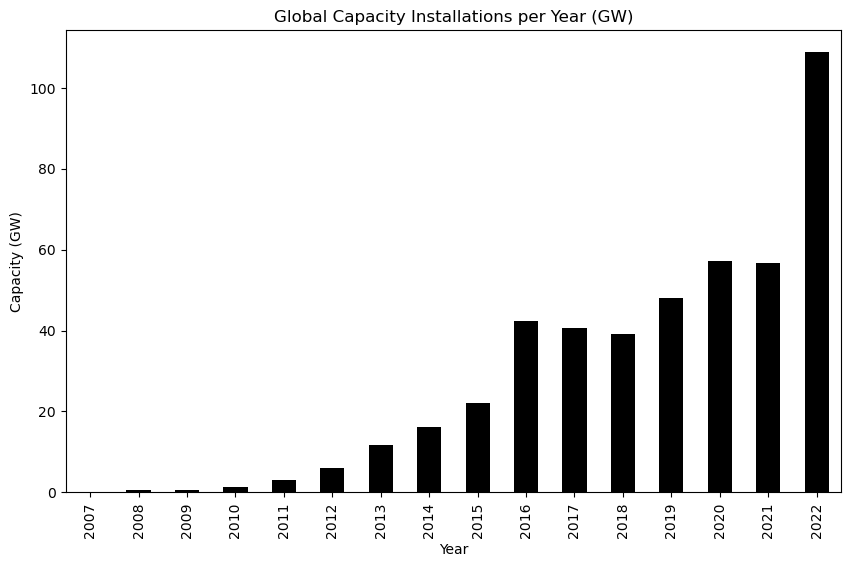

In [20]:
##Task 3c
gdf['Capacity (GW)'] = gdf['Capacity (MW)'] / 1000

required_data= gdf[(gdf['Start year'] >= 2000) & (gdf['Start year'] <= 2022)]

annual_cap = required_data.groupby(required_data['Start year'].astype(int))['Capacity (GW)'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
annual_cap.plot(kind='bar', color='black')

plt.xlabel('Year')

plt.ylabel('Capacity (GW)')

plt.title('Global Capacity Installations per Year (GW)')

plt.show()


In [21]:
# Task 3d 
data['Start year'] = pd.to_datetime(data['Start year'], errors='coerce')

pv_parks_data = data[data['Technology Type'] == 'PV']

oldest_park = pv_parks_data[pv_parks_data['Start year'] == pv_parks_data['Start year'].min()]

print("oldest PV Parks")

print(oldest_park[['Project Name', 'Start year','Capacity (MW)','Country', 'Status']])

oldest PV Parks
                          Project Name                    Start year  \
14381  Hoya De Los Vicentes solar farm 1970-01-01 00:00:00.000002007   
14432          La Magascona solar farm 1970-01-01 00:00:00.000002007   
14504              Luzentia solar farm 1970-01-01 00:00:00.000002007   
14734            Serrezuela solar farm 1970-01-01 00:00:00.000002007   

       Capacity (MW) Country     Status  
14381           23.0   Spain  operating  
14432           23.0   Spain  operating  
14504           23.0   Spain  operating  
14734           32.5   Spain  operating  


In [22]:
# Task 3e - The three Largest Operating Solar parks is to be determined with respective fields mentioned

working_sol_park= data[data['Status'] == 'operating']

sorted_solar_parks = working_sol_park.sort_values(by='Capacity (MW)', ascending=False)

largest_three_solar_parks = sorted_solar_parks.head(3)


print("three Largest Operating Solar Parks:")




print(largest_three_solar_parks[['Project Name', 'Country', 'Capacity (MW)', 'Start year', 'State/Province', 'Technology Type']])

three Largest Operating Solar Parks:
                                            Project Name  \
9749   Ningxia Lingwu - Hunan Power Export State Ener...   
5631                           Noor Abu Dhabi solar farm   
10028                Qinghai Hainan Talatan 1 solar farm   

                    Country  Capacity (MW)                    Start year  \
9749                  China         2000.0 1970-01-01 00:00:00.000002023   
5631   United Arab Emirates         1177.0 1970-01-01 00:00:00.000002019   
10028                 China         1000.0 1970-01-01 00:00:00.000002020   

          State/Province Technology Type  
9749             Ningxia              PV  
5631   Abu Dhabi Emirate              PV  
10028            Qinghai              PV  


In [24]:
# Task 3f - 
req_statuses = ["construction", "pre-construction", "announced"]

req_data = data[data['Status'].str.lower().isin(req_statuses)]

status_cap =req_data.groupby('Status')['Capacity (MW)'].sum() / 1000

print("Total Capacity for project status (in GW):")

print(status_cap)


Total Capacity for project status (in GW):
Status
announced           308.8301
construction        212.2908
pre-construction    663.1754
Name: Capacity (MW), dtype: float64


Text(0.5, 1.0, 'Solar parks in operation')

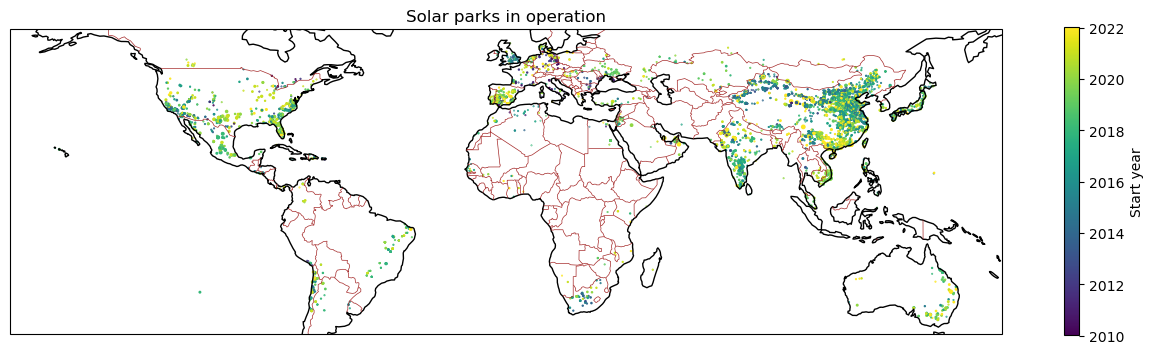

In [34]:
# Task 3g 

# for parks from 2010-2022

opr = gdf[(gdf['Status'] == "operating") & (gdf['Start year'] >= 2010) & (gdf['Start year'] <= 2022)]


fig = plt.figure(figsize=(16, 4))

ax = plt.axes(projection=ccrs.PlateCarree())

opr.plot(
    ax=ax,
    column="Start year",
    markersize=opr['Capacity (MW)']/100,
    legend = True,
    legend_kwds={'label': "Start year"}
)

ax.coastlines()

ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5, edgecolor='brown')

ax.set_title('Solar parks in operation')


Text(0.5, 1.0, 'Solar parks under  the pre_construction')

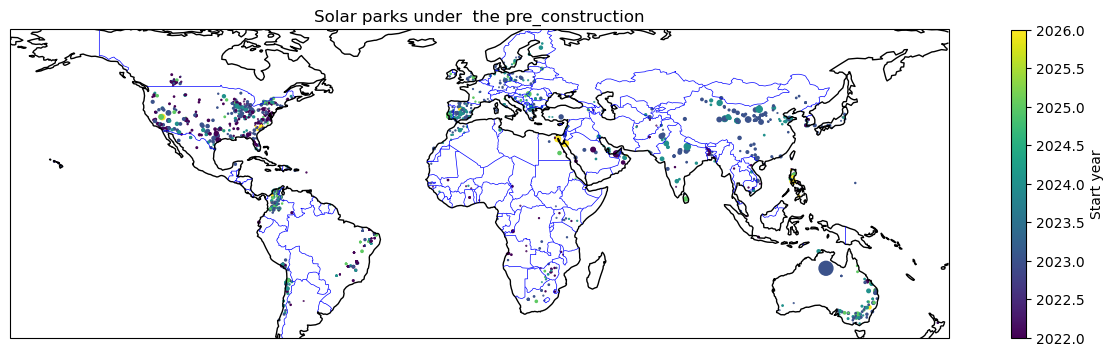

In [36]:
# for parks from 2022 to 2026
opr = gdf[gdf['Status'].isin(["pre-construction", "construction"]) & (gdf['Start year'] >= 2022) & (gdf['Start year'] <= 2026)]

fig = plt.figure(figsize=(16, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
opr.plot(
    ax=ax,
    column="Start year",
    markersize=opr['Capacity (MW)']/100,
    legend = True,
    legend_kwds={'label': "Start year"}
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5, edgecolor='blue')
ax.set_title('Solar parks under  the pre_construction')

In [37]:
# Task 3h - 

opr_proj= gdf[gdf['Status'] == 'operating']

solar_data = opr_proj.dropna(subset=['Start year']).copy()

current_year = 2024 
solar_data ['Age'] = current_year - solar_data ['Start year']

weighted_age = (solar_data ['Age'] * solar_data ['Capacity (MW)']).sum() / solar_data ['Capacity (MW)'].sum()

print(" mean age of remaining operating solar parks:", weighted_age)

 mean age of remaining operating solar parks: 5.465809391753277


In [43]:
# Task 3i 
avg_age_conti = {}
grop_conti = solar_data.groupby('Region')

for continent, group in grop_conti:
    wei_avg_age = np.average(group['Age'], weights=group['Capacity (MW)'])
    avg_age_conti[continent] = wei_avg_age

oldcont = max(avg_age_conti, key=avg_age_conti.get)
newcon = min(avg_age_conti, key=avg_age_conti.get)

oldest_age = avg_age_conti[oldcont]
newest_age = avg_age_conti[newcon]

print("The average age in years for each continent is:",avg_age_conti)


print(f"the oldest fleet continent is {oldcont} with an average age of {oldest_age:.2f} years.")
print(f"Tthe newest fleet continent is {newcon} with an average age of {newest_age:.2f} years.")

The average age in years for each continent is: {'Africa': 6.115295865050526, 'Americas': 5.66466687759235, 'Asia': 5.368126799685772, 'Europe': 6.000217412310367, 'Oceania': 4.266894387001478}
the oldest fleet continent is Africa with an average age of 6.12 years.
Tthe newest fleet continent is Oceania with an average age of 4.27 years.
